In [1]:
!pip install -qU  json-repair networkx langchain-core langchain-openai langchain-experimental langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 448.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.

In [2]:
import os
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_openai import ChatOpenAI
import networkx as nx
from langchain.chains import GraphQAChain
from langchain_core.documents import Document
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph
from google.colab import userdata
from typing import Dict, Any

In [3]:
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

In [4]:
llm = ChatOpenAI(
             max_tokens=4000,
             model_name="gpt-4o-mini",
             temperature=0
             )

In [121]:
text = """
Mary Shelley geborene Mary Godwin (* 30. August 1797 in London, England; † 1. Februar 1851 ebenda), häufig auch als Mary Wollstonecraft Shelley (auch Mary W. Shelley) bezeichnet, war eine englische Schriftstellerin des frühen 19. Jahrhunderts. Sie ist als Autorin von Frankenstein oder Der moderne Prometheus (1818), einem bekannten Werk der romantischen und fantastischen Literatur, in die Literaturgeschichte eingegangen. Zu ihrem Gesamtwerk zählen mehrere Romane, Kurzgeschichten, Theaterstücke, Essays, Gedichte, Rezensionen, Biografien und Reiseerzählungen. Sie gab außerdem das Werk ihres früh verstorbenen Ehemanns, Percy Bysshe Shelley, mit dem sie seit 1816 verheiratet war, heraus.
Ihr Vater war der Sozialphilosoph und Begründer des philosophischen Anarchismus William Godwin. Ihre Mutter war die Schriftstellerin und Feministin Mary Wollstonecraft, die mit Verteidigung der Rechte der Frau (1792) eine der frühesten und grundlegenden Arbeiten der Frauenrechtsbewegung verfasste. Mary Godwins Mutter starb kurz nach der Geburt ihrer Tochter. William Godwin zog seine Tochter gemeinsam mit ihrer älteren Halbschwester zunächst allein auf. Sie erhielten durch ihn und seine spätere zweite Ehefrau eine informelle, aber umfassende Erziehung.
Ab 1814 führten Mary Godwin und der verheiratete Dichter Percy Bysshe Shelley eine Liebesbeziehung. Den Sommer des Jahres 1816 verbrachte das Paar mit dem romantischen Dichter Lord Byron, seinem Leibarzt John Polidori und Marys Stiefschwester Claire Clairmont am Genfersee. Dort entwarf Mary Godwin die Idee für ihren Roman Frankenstein. Ende 1816, nach dem Tod von Percy B. Shelleys Ehefrau, heirateten Mary Godwin und Shelley in England. Von 1818 bis 1822 lebte das Paar in Italien.
Nach dem Unfalltod ihres Ehemannes 1822 kehrte Mary Shelley mit ihrem einzigen überlebenden Kind nach England zurück. Dort setzte sie ihre Karriere als Schriftstellerin fort; es entstanden unter anderem der historische Roman Perkin Warbeck (1830) und der apokalyptische Roman Verney, der letzte Mensch (1826) sowie die Erzählungen Lodore (1835) und Falkner (1837). Ferner schrieb Mary Shelley Kurzgeschichten für Almanache und Geschenkbücher, zahlreiche biografische Aufsätze für Dionysius Lardners Cabinet Cyclopaedia (1829–1846) sowie Berichte über ihre Reisen durch Europa mit ihrem Sohn. Mary Shelley starb im Alter von 53 Jahren, vermutlich an einem Hirntumor.
Bis in die 1970er Jahre wurde Mary Shelley vor allem als Verwalterin des literarischen Nachlasses ihres Ehemanns sowie als Verfasserin von Frankenstein wahrgenommen. Frankenstein, ihr bekanntestes Werk, wird auch zweihundert Jahre nach seiner Erstveröffentlichung noch gelesen und wurde mehrfach für Bühne und Film adaptiert. Ab der Mitte des 20. Jahrhunderts fanden ihre übrigen Arbeiten ebenfalls wieder Beachtung und erschienen in Neuausgaben, zusammen mit einer wachsenden Zahl wissenschaftlicher und populärer Biografien über die Schriftstellerin. Zudem ist die Literaturwissenschaft seit den 1970er Jahren zu einer umfassenderen Wertung ihres vielseitigen Werkes gelangt und würdigt heute auch ihre späteren Romane und Erzählungen.

William Godwin (* 3. März 1756 in Wisbech, Cambridgeshire; † 7. April 1836 in Westminster, Middlesex) war ein englischer Schriftsteller und Sozialphilosoph. Auf Grund seines Hauptwerks Enquiry Concerning Political Justice, das 1792 erschien, gilt er als Begründer des philosophischen Anarchismus. In seinem Werk feierte er die französische Revolution und prangerte die Ehe als ein unsinniges Monopol an. In seinen späteren Ausgaben mäßigte er diese Ansichten erheblich.

Mary Wollstonecraft (* 27. April 1759 in Spitalfields, London; † 10. September 1797 in London) war eine englische Schriftstellerin, Übersetzerin, Philosophin und Frauenrechtlerin irischer Abstammung. Ihr bekanntestes Werk ist A Vindication of the Rights of Woman (1792), in dem sie in kritischer Auseinandersetzung mit den Philosophen der Aufklärung auf das Recht der Frauen auf Bildung pochte.
Nach ihrer Heirat mit William Godwin wurde sie auch mit dem Doppelnamen Mary Wollstonecraft-Godwin bezeichnet. Mary Wollstonecraft war die Mutter von zwei Töchtern. Kurz nach der Geburt ihres jüngeren Kindes, der Schriftstellerin Mary Shelley (auch Mary Wollstonecraft Shelley genannt), starb sie in Folge einer Sepsis.

Percy Bysshe Shelley (* 4. August 1792 in Field Place, Sussex; † 8. Juli 1822 im Meer bei Viareggio in der italienischen Region Toskana) war ein britischer Schriftsteller der englischen Romantik.
"""

In [122]:
documents = [Document(page_content=text)]
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [123]:
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Person", "Work", "Year", "Place", "Profession"],
    allowed_relationships=["CREATED", "FATHER_OF", "MOTHER_OF", "CHILD_OF", "HAS_PROFESSION", "MARRIED_WITH", "DIED_IN", "BORN_IN", "LIVED_IN"],
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(
    documents
)

In [124]:
graph = NetworkxEntityGraph()

# Add nodes to the graph
for node in graph_documents_filtered[0].nodes:
    graph.add_node(node.id)

# Add edges to the graph
for edge in graph_documents_filtered[0].relationships:
    graph._graph.add_edge(
            edge.source.id,
            edge.target.id,
            relation=edge.type,
        )

In [125]:
chain = GraphQAChain.from_llm(
    llm=llm,
    graph=graph,
    verbose=True
)

In [126]:
def create_invoke_input(question: str) -> Dict[str, Any]:
    return {"query": question}


question = """Wer war Mary Shelley?"""
invoke_input = create_invoke_input(question)
result = chain.invoke(invoke_input)

print(result["result"])



> Entering new GraphQAChain chain...
Entities Extracted:
Mary Shelley
Full Context:
Mary Shelley CREATED Frankenstein Oder Der Moderne Prometheus
Mary Shelley CREATED Perkin Warbeck
Mary Shelley CREATED Verney, Der Letzte Mensch
Mary Shelley CREATED Lodore
Mary Shelley CREATED Falkner
Mary Shelley CHILD_OF William Godwin
Mary Shelley CHILD_OF Mary Wollstonecraft
Mary Shelley MARRIED_WITH Percy Bysshe Shelley
Mary Shelley LIVED_IN Italy
Mary Shelley LIVED_IN Genfersee
Mary Shelley LIVED_IN 1970Er Jahre
Mary Shelley LIVED_IN 19. Jahrhundert

> Finished chain.
Mary Shelley war eine Schriftstellerin, die für ihre Werke wie "Frankenstein oder der moderne Prometheus" bekannt ist. Sie war die Tochter von William Godwin und Mary Wollstonecraft, heiratete Percy Bysshe Shelley und lebte in verschiedenen Orten, darunter Italien und am Genfersee, im 19. Jahrhundert.


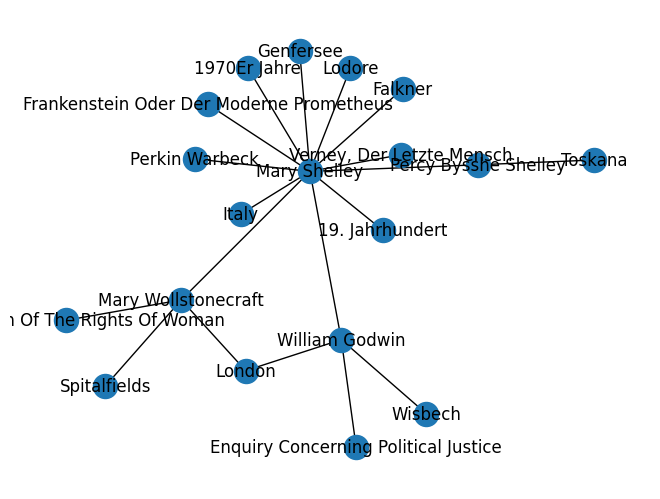

In [127]:
graph = nx.Graph()

# Add nodes and edges to the NetworkX graph
for node in graph_documents_filtered[0].nodes:
    graph.add_node(node.id, label=node.id)  # Adding a label for visualization

for edge in graph_documents_filtered[0].relationships:
    graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

# Now you can draw the graph using networkx functions
nx.draw(graph, with_labels=True)